* 1. Perform Test Classification using Multinomial Naive Bayes(already implemented in sklearn).
* 2. Implement Naive Bayes on your own from scratch for text classification. 
* 3. Compare Results of your implementation of Naive Bayes with one in Sklearn.

## Using inbuilt classifier

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
%matplotlib inline
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()

In [5]:
## Let's see the target names
target = data.target_names

In [6]:
## Let's exploring aLL the features
target,len(target)

(['alt.atheism',
  'comp.graphics',
  'comp.os.ms-windows.misc',
  'comp.sys.ibm.pc.hardware',
  'comp.sys.mac.hardware',
  'comp.windows.x',
  'misc.forsale',
  'rec.autos',
  'rec.motorcycles',
  'rec.sport.baseball',
  'rec.sport.hockey',
  'sci.crypt',
  'sci.electronics',
  'sci.med',
  'sci.space',
  'soc.religion.christian',
  'talk.politics.guns',
  'talk.politics.mideast',
  'talk.politics.misc',
  'talk.religion.misc'],
 20)

In [7]:
categories = ['alt.atheism',
  'comp.graphics',
  'comp.os.ms-windows.misc',
  'comp.sys.ibm.pc.hardware',
  'comp.sys.mac.hardware',
  'comp.windows.x',
  'misc.forsale',
  'rec.autos',
  'rec.motorcycles',
  'rec.sport.baseball',
  'rec.sport.hockey',
  'sci.crypt',
  'sci.electronics',
  'sci.med',
  'sci.space',
  'soc.religion.christian',
  'talk.politics.guns',
  'talk.politics.mideast',
  'talk.politics.misc',
  'talk.religion.misc']

In [8]:
## Traning the Data with these categories
train = fetch_20newsgroups(subset= "train", categories= categories)

In [9]:
## Testing the Data with these categories as well
test = fetch_20newsgroups(subset="test", categories=categories)

**Let's see how is our train and test data**

In [10]:
print(len(train.data)), print(len(test.data))

11314
7532


(None, None)

In [11]:
print(train.data[0], categories[train.target[0]])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----




 rec.autos


## Training the model using SCIKIT-LEARN library

In [12]:
## Importing libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

In [13]:
## Building a model using multinomial Naive Bayes
model = make_pipeline(TfidfVectorizer(),MultinomialNB())
## Training the Data with training Dataset
model.fit(train.data, train.target)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [14]:
predicted_label = model.predict(test.data)

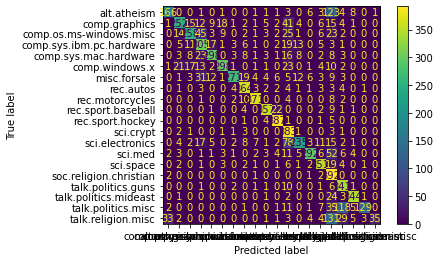

In [15]:
## Creating a confusion matrix

from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
cm = confusion_matrix(y_true = test.target, y_pred = predicted_label)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels= categories)
disp.plot()


In [16]:
categories = np.array(data.target_names)

In [17]:
def predictions(my_text):
    prediction = model.predict([my_text])
    return categories[prediction]

In [18]:
predictions("space") ## You can change the sentence to check

array(['sci.space'], dtype='<U24')

## Implementing Naive Bayes From Scratch

In [19]:
## importing nltk
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [20]:
## I will not take common words from the documents so I will choose only specific words
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stops = set(stopwords.words("english"))

In [21]:
documents =data.data
features =data.target

In [22]:
## Now I will also put punctuations in my stoping words
punct = list(string.punctuation)
stops.update(punct)

* Link https://towardsdatascience.com/text-pre-processing-stop-words-removal-using-different-libraries-f20bac19929a

In [23]:
len(data) ## So there 5 different keys there
text =data.data

In [24]:
modified_data=[word_tokenize(doc) for doc in documents]

In [25]:
#splitting these documents in train and test set
x_train, x_test, y_train, y_test=train_test_split(modified_data, features, random_state=9)

In [26]:
word_dict =[]
for doc in x_train:
    for word in doc:
        if (word.lower() not in stops) and len(word)!=1 and len(word)!=2 and word[0]!="'" and word!="n't" and word[0]!=".":
            word_dict.append(word)

In [27]:
len(word_dict)

1393813

Now we will be building a dictionary where key will be the word from word_dict and  the corresponding value will
be the frequency of the word

In [28]:
## 
def creating_dictionary(word_dict):
    dictionary = {}
    for word in word_dict:
        if word in dictionary.keys():
            dictionary[word]+=1
        else:
            dictionary[word] = 1
    return dictionary        

In [29]:
dictionary = creating_dictionary(word_dict)

In [30]:
##Checking the number of words
sum1 = 0
for d in dictionary.values():
    sum1 += d

In [31]:
sum1

1393813

In [32]:
## Getting the wordsa nd their frequency from our created dictionary
freq=np.array([i for i in dictionary.values()])
words=np.array([i for i in dictionary.keys()])

In [33]:
## Sorting in descending order
words=words[np.argsort(freq)][::-1]
freq=np.sort(freq)[::-1]

In [34]:
features=words[0:3000] ## Taking first 3000 word

## Now we will make our function to create 2-D array with feature as the `word`

In [35]:
%%time
## return Data will be number_of_example X 3000
def Creating_Data(X,features = features):
    X_return = np.zeros((len(X), len(features))) ## Filling all the values withzeros to initialize
    for i in range(len(X)):
        ## ith document
        current_doc = X[i]
        print(f"Current document is {i+1}")
        for word in current_doc:
            #finding whether we have the word in our document
            if word in features:
                print("Yes the word is in feature")
                for j in range(len(features)):
                    if features[j] == word:
                        X_return[i][j]+=1
                        print(f"incrementing the value {X_return[i][j]}")
                        break
    return X_return    

CPU times: user 0 ns, sys: 6 µs, total: 6 µs
Wall time: 10.5 µs


In [36]:
x_train2 = Creating_Data(x_train, features) ## X_train extraction t is taking a whole lot time

Streaming output truncated to the last 5000 lines.
Yes the word is in feature
incrementing the value 1.0
Yes the word is in feature
incrementing the value 1.0
Yes the word is in feature
incrementing the value 1.0
Yes the word is in feature
incrementing the value 1.0
Yes the word is in feature
incrementing the value 1.0
Yes the word is in feature
incrementing the value 1.0
Yes the word is in feature
incrementing the value 1.0
Yes the word is in feature
incrementing the value 2.0
Yes the word is in feature
incrementing the value 1.0
Yes the word is in feature
incrementing the value 1.0
Yes the word is in feature
incrementing the value 1.0
Yes the word is in feature
incrementing the value 1.0
Yes the word is in feature
incrementing the value 1.0
Yes the word is in feature
incrementing the value 1.0
Yes the word is in feature
incrementing the value 1.0
Yes the word is in feature
incrementing the value 1.0
Yes the word is in feature
incrementing the value 3.0
Yes the word is in feature
incr

In [37]:
x_train2

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.]])

In [39]:
X_return[:,:10]

array([[1., 1., 1., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [44]:
def fit(x_train, y_train): # Fitting the data
    count=dict()
    for i in range(20):
        needed_docs=x_train[y_train==i]
        count[i]=dict()
        count[i]['total']=0
        for j in range(len(features)):
            count[i][features[j]]=needed_docs[:, j].sum()
            count[i]['total']+=count[i][features[j]]
    return count

In [45]:
def probability(dictionary, x, current_class):
    probs=[]
    for i in range(len(x)):
        if x[i]!=0:
            numerator=dictionary[current_class][features[i]]
            denominator=dictionary[current_class]['total']
            proba=np.log((numerator+1) - np.log(denominator+len(x))) ## With laplace correction
            probs.append(proba)
    return sum(probs)


In [46]:
def predict_Best_class(dictionary, x): # Same as discussed in the class itself
    classes = dictionary.keys()
    best_p = -1000
    best_class = -1
    first_run =True
    for current_class in classes:
        p_current_class = probability(dictionary, x, current_class)
        if (first_run or p_current_class > best_p):
            best_p = p_current_class
            best_class = current_class

        first_run = False
    
    return best_class

In [47]:
## Creating the prediction function
def prediction(X,dictionary):
  y_pred = []
  for docs in X:
    y_pred.append(predict_Best_class(dictionary,docs))
  return y_pred  

In [48]:
dictionary=fit(x_train2, y_train)

In [50]:
x_test2 = Creating_Data(x_test)

Streaming output truncated to the last 5000 lines.
incrementing the value 1.0
Yes the word is in feature
incrementing the value 2.0
Yes the word is in feature
incrementing the value 1.0
Yes the word is in feature
incrementing the value 1.0
Yes the word is in feature
incrementing the value 1.0
Yes the word is in feature
incrementing the value 2.0
Yes the word is in feature
incrementing the value 2.0
Yes the word is in feature
incrementing the value 2.0
Yes the word is in feature
incrementing the value 4.0
Yes the word is in feature
incrementing the value 1.0
Yes the word is in feature
incrementing the value 4.0
Yes the word is in feature
incrementing the value 2.0
Yes the word is in feature
incrementing the value 2.0
Yes the word is in feature
incrementing the value 13.0
Yes the word is in feature
incrementing the value 2.0
Yes the word is in feature
incrementing the value 1.0
Yes the word is in feature
incrementing the value 1.0
Yes the word is in feature
incrementing the value 29.0
Ye

In [54]:

y_preds = prediction(x_test2,dictionary)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys
